# Проект анализа продаж в интернет-магазине "Стримчик" 

# Общее описание проекта

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Подготовка к анализу, загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
!pip install tabulate
from tabulate import tabulate
from scipy import stats as st

### Знакомство в сетом

Общий размер сета 16714 строк, имеются пропуски в разделах: Год релиза, жанр, название, оценки критиков и игроков, а также в разделе рейтинга

вне проекта, оставил ссылку чтобы не переписывать каждый раз, работаю с проектом локально

('/datasets/games.csv', sep=',')

(r'C:\Users\PC_Maks\Desktop\study\prefabricated_project\games.csv', sep=',')

In [2]:
try:
    data = pd.read_csv ('/datasets/games.csv', sep=',')
except:
    data = pd.read_csv ('https://code.s3.yandex.net/datasets/games.csv', sep=',')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
display (data.shape)
display (data.head ())
display (data.info ())

(16715, 11)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

##  Подготовка данных

1. Замена названия столбцов (приведите к нижнему регистру);
2. Преобразование данных в нужные типы, с описанием в каких столбцах провели замену и почему;
3. Обработка пропусков (при необходимости):
    3.1. Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
    3.2. Описать причины, которые могли привести к пропускам;
4. Изучить аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
5. Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

**Сразу можем сказать, что потребуется замена типов данных в столбце 'Year_of_Release' на int, а также в столбце 'User_Score' на float64 

### Замена названия столбцов**

In [3]:
data.columns = [x.lower() for x in data.columns]

#### Проверка на дубликаты
Сразу проверим на дубликаты - дубликат только 1 - Madden NFL 13, было еще переиздание NFS, его оставляем. 

In [4]:
print (f' Явные дублика во всех строках и столбцах {data.duplicated ().sum ()}')

duplicates = data.duplicated(subset={'name', 'platform', 'year_of_release'})
duplicate_rows = data.loc[duplicates]
display (duplicate_rows.info())
display (duplicate_rows)


 Явные дублика во всех строках и столбцах 0
<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 14244 to 16230
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1 non-null      object 
 1   platform         2 non-null      object 
 2   year_of_release  2 non-null      float64
 3   genre            1 non-null      object 
 4   na_sales         2 non-null      float64
 5   eu_sales         2 non-null      float64
 6   jp_sales         2 non-null      float64
 7   other_sales      2 non-null      float64
 8   critic_score     1 non-null      float64
 9   user_score       1 non-null      object 
 10  rating           1 non-null      object 
dtypes: float64(6), object(5)
memory usage: 192.0+ bytes


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [5]:
data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], inplace=True)

проверим что получилось

In [6]:
duplicates = data.duplicated(subset={'name', 'platform'})
duplicate_rows = data.loc[duplicates]
print(duplicate_rows.info())
print(duplicate_rows)

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 1591 to 11715
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3 non-null      object 
 1   platform         3 non-null      object 
 2   year_of_release  2 non-null      float64
 3   genre            3 non-null      object 
 4   na_sales         3 non-null      float64
 5   eu_sales         3 non-null      float64
 6   jp_sales         3 non-null      float64
 7   other_sales      3 non-null      float64
 8   critic_score     3 non-null      float64
 9   user_score       3 non-null      object 
 10  rating           3 non-null      object 
dtypes: float64(6), object(5)
memory usage: 288.0+ bytes
None
                              name platform  year_of_release     genre  \
1591   Need for Speed: Most Wanted     X360           2005.0    Racing   
4127            Sonic the Hedgehog      PS3              NaN  Platform   
11715  Need for

### Обработка типов данных, пропусков
Преобразование данных в нужные типы, с описанием в каких столбцах провели замену и почему

Перед заменой типов данных посмотрим на содержание 

In [7]:
display (data.isna ().sum ()/ len(data)* 100)
display (data.isna ().sum ())

name                0.005983
platform            0.000000
year_of_release     1.609526
genre               0.005983
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319332
user_score         40.088554
rating             40.477473
dtype: float64

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

Пропуски в разделе года выпуска - 1,6%, 2 пропуска в названии и жанре - 0,01%, и более 50%/40% пропуски в разделах рейтингов (критики/пользователи) и возрастного рейтинга. Будем разбираться по порядку. 

In [8]:
def pass_value_barh_1(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 14, grid=True)
            .set_title('Пример' + "\n", fontsize = 24, color = 'SteelBlue')
            
        );
        plt.xlabel('% пропусков',  fontsize = 18)
        plt.ylabel('Столбец с пропусками',  fontsize = 18)
        
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

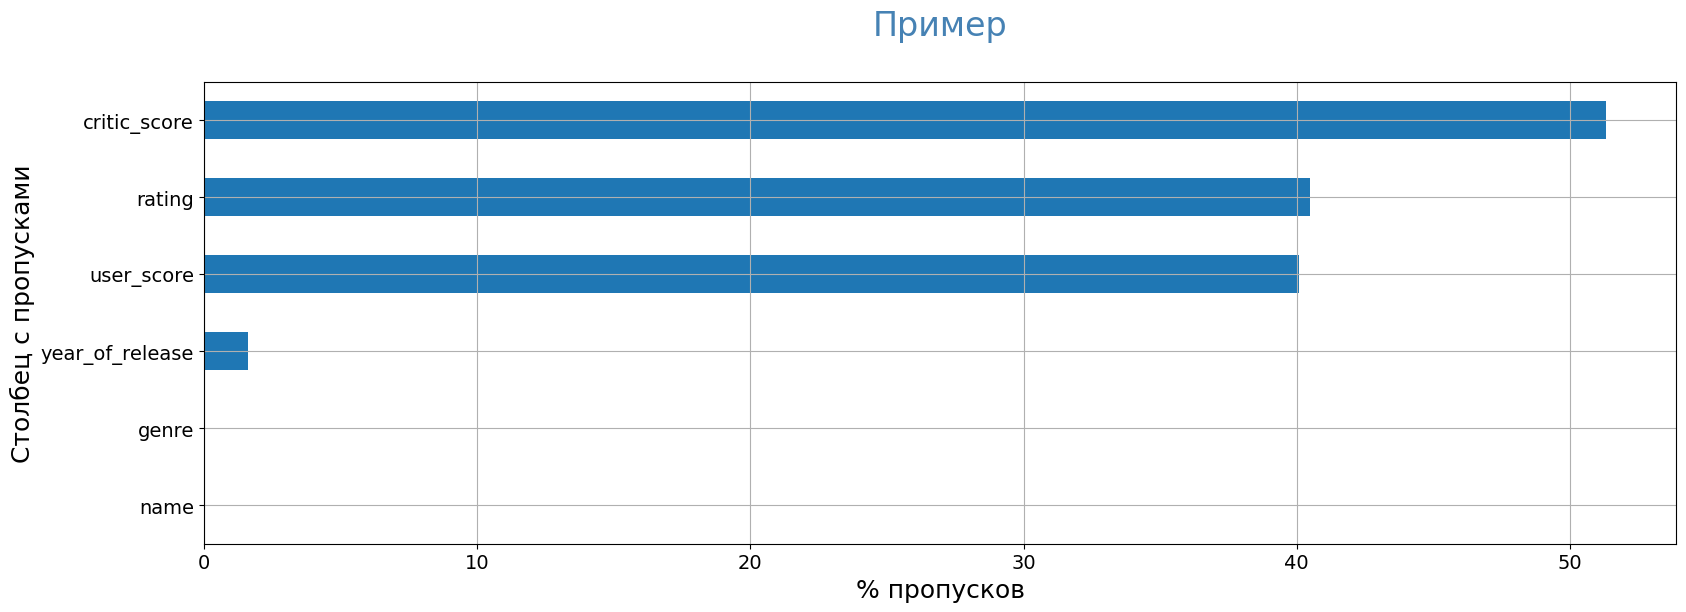

In [9]:
pass_value_barh_1(data)

#### *Пропуски в названиях игр*

тип данных корректен, можем приступить к отработки пропусков 

In [10]:
display (data ['name'].unique ())
df1 = data [data ['name'].isna () == True]
df1

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Пропуск в разделе название только 2 позициях, игры 1993 года, для платформы Gen, при это обращаем внимание, что пропуск не только в названиях, но и в категории жанр. Учитывая незначительное количество (менее 0.01 процента) - удаляем. И сразу проверим удалились ли пропуски в столбце названия игр и жанр

In [11]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [12]:
#data = data.dropna (subset = 'name').reset_index (drop=True)
data = data.dropna (subset=['name']).reset_index (drop=True)
data.isna ().sum ()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

#### Обработка типов данных (год)
Столбец - год выпуска, обработка типа данных и пропусков

Тип данных необходимо заменить на int, но предварительно отработаем пропуск. Учитывая текущие этап анализа, пропуски данного столбца заменяем на заглушку 1970 (игры из списка начинаются с 1980)

In [13]:
data ['year_of_release'] = data ['year_of_release'].fillna (1970).astype (int)


*Посмотрим на игры у которых пропущен год выпуска*

In [14]:
df_year = data.query ('year_of_release == 1970').reset_index (drop=True)
display (df_year['platform'].value_counts ())


platform
PS2     34
Wii     34
X360    30
DS      30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: count, dtype: int64

*Теоритечески можно найти даты выходов каждой из игра, или взять дату экватора периода жизни консоли, но это трудоемкая процедура, и учитывая количество пропусков около 1,6%  - прихожу к выводу, что допустимо их удалить*

In [15]:
data = data.query ('year_of_release != 1970'). reset_index (drop=True)
data.isna ().sum ()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

#### Анализ пропусков (рейтингы и оценки)
Переходим к анализу и обработке пропусков в разделах рейтинга критиков, пользователей и возрастного рейтинга

Для следующих шагов мне потребуется добавить столбец - общее количество продаж. Пропусков в продажах по регионам у нас нет, поэтому можем споконой посчитать значения для нового столбца

In [16]:
data ['total_sales'] = data['na_sales'] + data['eu_sales']+data['jp_sales']+data ['other_sales']   
data.head ()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


##### Пропуски в оценках критиков 
*Сначала посмотри на отсутствующие значения в столбце рейтинг критиков*

оценка критиков в диапазоне от 0 до 100, значения вещественные

In [17]:
display (data ['critic_score'].unique ())



array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Посмтрим на различные оценки критиков в зависимости от жанров и платформ, пропуски пока уберем

In [18]:
platform_critic=data.pivot_table(index='platform',columns='genre',values='critic_score')
platform_critic=platform_critic.dropna ()
platform_critic

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
platform,,,,,,,,,,,,
3DS,62.982759,67.500000,68.857143,69.100000,72.444444,67.100000,62.000000,72.576923,78.000000,69.300000,62.285714,63.333333
DS,58.325926,61.293103,63.133333,63.322581,67.648148,66.640000,58.310345,69.154639,66.531250,62.037037,63.575000,65.000000
GBA,62.176471,65.384615,67.250000,64.518519,67.807692,69.714286,67.547619,75.805556,66.142857,70.555556,69.740000,80.125000
GC,67.917647,64.571429,69.962963,63.565217,63.813559,66.600000,65.652174,72.956522,69.547619,77.200000,77.411111,74.875000
PC,74.248175,71.875000,76.333333,73.000000,74.800000,81.500000,77.444444,80.036145,76.553846,73.378049,80.333333,75.515873
PS,66.875000,55.625000,67.625000,73.833333,76.000000,81.000000,70.300000,79.428571,68.857143,80.500000,73.645161,63.800000
PS2,66.931727,62.348837,70.243590,67.628205,66.375000,72.636364,66.844720,71.563025,66.832117,70.603774,72.478632,69.900000
PS3,69.012766,68.300000,73.298246,72.166667,69.727273,74.000000,71.953846,70.551282,68.983871,62.800000,73.304000,73.375000
PS4,72.107143,73.428571,72.636364,70.555556,71.727273,88.000000,72.000000,73.375000,75.171429,72.500000,68.365854,69.750000


<AxesSubplot:xlabel='genre', ylabel='platform'>

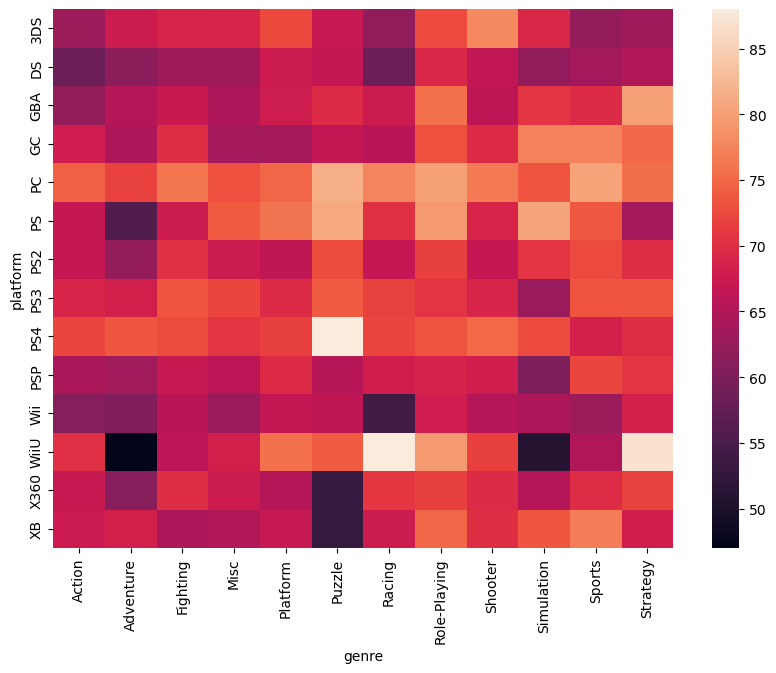

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(platform_critic)

Видимо Wii не очень получается делать адвенчуры и симуляторы. А из данных можно сделать вывод, что оценки критиков более менее равноеро распределеяются по жанрам. Можем заменить пропуски средними значениями по жанру (разбросы не большие, диапазон фиксированный) 

In [20]:
data ['critic_score'] = data ['critic_score'].fillna (111)

##### *Пропуски в оценках игроков*

оценка игроков диапазоне от 0 до 10, значения вещественные. Повторим процедуру анализа как и с оценкой критиков, но сначала разберемся с некоторыми значениями

In [21]:
display (data ['user_score'].unique ())


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данном столбце встречается значение TBD - аббревиатура от английского To Be Determined (будет определено)
или To Be Decided (будет решено)
С высокой долей вероятсности можно предположить, что отзывов пока нет, либо их количество крайне мало.

Для дальнейшей работы заменим "tbd" на nan

In [22]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN).astype (float) 
display (data ['user_score'].unique ())
data['user_score'].isna ().sum ()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

8981

сгруппируем рейтинг пользователей, создадим таблицу со средними значениями

используем заглушку и проверим нашу теорию с жанрами, годами - результат проверки - подавляющее большенство игр выпущены до 2000 годов, только 102 игры за период с 2000 по 2001 год остались без рейтинга пользоватлей после предварительной обработки данных - учитывая результаты пологаю можно заполнить пропуски средним значением

In [23]:
data['user_score'].unique()
data['user_score'] = data['user_score'].fillna(111)
df_with_nan_years =data.query ('user_score==111').sort_values (by='year_of_release') 
display (df_with_nan_years)
display (df_with_nan_years ['year_of_release'].value_counts ())
df_with_nan_years ['platform'].value_counts ()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6202,Bridge,2600,1980,Misc,0.25,0.02,0.00,0.00,111.0,111.0,NaN,0.27
1744,Kaboom!,2600,1980,Misc,1.07,0.07,0.00,0.01,111.0,111.0,NaN,1.15
6769,Checkers,2600,1980,Misc,0.22,0.01,0.00,0.00,111.0,111.0,NaN,0.23
1947,Defender,2600,1980,Misc,0.99,0.05,0.00,0.01,111.0,111.0,NaN,1.05
2613,Boxing,2600,1980,Fighting,0.72,0.04,0.00,0.01,111.0,111.0,NaN,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...
5370,Star Ocean 5: Integrity and Faithlessness,PS4,2016,Role-Playing,0.07,0.09,0.15,0.03,111.0,111.0,NaN,0.34
14671,Sengoku Otome: Legend Battle,PSV,2016,Action,0.00,0.00,0.03,0.00,111.0,111.0,NaN,0.03
12516,Kamen Rider: Battride War Genesis,PS4,2016,Action,0.00,0.00,0.06,0.00,111.0,111.0,NaN,0.06
14636,Resident Evil 5 HD,PS4,2016,Action,0.02,0.00,0.00,0.01,111.0,111.0,NaN,0.03


year_of_release
2009    812
2010    788
2008    766
2011    635
2007    568
2006    454
2002    365
2005    356
1998    348
2012    314
2015    309
1999    307
2004    273
1997    271
2003    259
1996    255
2014    252
2000    243
2013    240
2016    240
2001    225
1995    219
1994    120
1993     60
1981     46
1992     42
1991     41
1982     36
1986     21
1983     17
1989     17
1987     16
1990     16
1984     14
1988     14
1985     13
1980      9
Name: count, dtype: int64

platform
DS      1609
PS      1031
PS2      907
PSP      775
Wii      738
GBA      560
PS3      445
3DS      341
N64      316
PSV      287
X360     287
SNES     239
XB       232
PC       202
GC       185
SAT      173
PS4      135
2600     116
NES       98
GB        97
XOne      65
WiiU      47
DC        38
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [24]:
#df_without_111 = data.query ('user_score!=111')
#user_score_mean_without_111 = df_without_111 ['user_score'].mean ()
#data['user_score'] = data['user_score'].replace(111,user_score_mean_without_111)

data['user_score'].isna ().sum ()


0

In [25]:
# check
data['user_score'].value_counts()

user_score
111.0    8981
7.8       322
8.0       285
8.2       276
8.3       252
7.5       249
8.5       247
7.9       246
8.1       237
7.7       236
7.3       232
8.4       221
7.0       216
7.4       213
7.6       213
8.6       209
6.8       191
8.7       186
7.1       180
8.8       179
7.2       166
8.9       151
6.6       145
6.9       138
6.3       135
6.7       125
6.0       123
6.5       121
9.0       119
6.2       112
6.4       105
5.8        97
9.1        89
6.1        82
5.7        77
5.9        76
5.6        72
5.4        71
5.3        70
5.5        68
5.0        64
5.2        54
4.8        49
5.1        44
9.2        43
4.9        39
4.6        37
4.3        37
4.4        33
4.5        32
9.3        31
4.1        31
4.2        27
4.0        27
3.8        27
3.5        26
2.8        24
4.7        24
3.4        23
3.1        23
3.0        21
3.7        19
3.6        18
3.3        15
3.9        13
2.5        12
3.2        12
2.4        11
9.4        11
2.0        10
2.9      

##### *Пропуски возрастного рейтинга**

Тип корректен, заменим пропуски на undefined, так как вероятно оценка рейтинга не давалась, а также рейтинг K-A ("Kids to Adults") заменим на рейтинг E («Everyone» — «Для всех»), ранее рейтинг E обозначался как K-A

In [26]:
data ['rating'] = data ['rating'].fillna ('undefined')
data['rating'] = data['rating'].replace('K-A','E')
display (data ['rating'].unique ())

array(['E', 'undefined', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [27]:
# check
data ['critic_score'] = data ['critic_score'].astype (int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int32  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.4+ MB


**Первичная обработка завершена. Замену пропусков, где поставили пока заглушки считаю нецелесообразной, так как это сильно исказит картину, при дальнейшем анализе примем решение оставить их как есть с заглушками и будем отсекать при исследовании, или найдем решение по их замещении какими-либо значениями**

### check

## Исследовательский анализ данных**

**3.1.** Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

**3.2.** Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

**3.3.** Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

**3.4.** Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

**3.5.** Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

**3.6.** Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

**3.7.** Соотнесите выводы с продажами игр на других платформах.

**3.8.** Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**----------------------------------------------------------------------**

Основная часть игр вышла в период с 2003 по 2010 гг.

Для удобства сделаем функцию, которая будет выводить результаты в виде графика, так как мы будем обращаться несколько раз к одному и тому же типу расчету по разным столбцам

In [28]:
def stat_bar(column_group, task, name='name'):
    try:
        plt.style.use('seaborn-muted')
        draw_plot = data.groupby(column_group)[name]        
        if task == 'count':
            draw_plot_calculated = draw_plot.count()
            plot = draw_plot_calculated.plot(kind='bar', y=name, grid=True, figsize=(10,5))
            plt.title('Количество выпускаемых игр по годам', fontsize=16, fontweight='bold' )
            plt.xlabel('Годы', fontsize=18)
            plt.ylabel('Количество игр', fontsize=18)
            plt.show ()
            plt.rcParams['font.family'] = 'Arial'
            plt.show()
            
        elif task == 'sum':
            draw_plot_calculated = draw_plot.sum().sort_values()
            plot = draw_plot_calculated.plot(kind='barh', y=name, grid=True, figsize=(10,10))
            plt.title('Количество выпускаемых игр в срезе платформ', fontsize=16, fontweight='bold' )
            plt.xlabel('Количество выпускаемых игр', fontsize=18)
            plt.ylabel('Платформа', fontsize=18)
            plt.show ()
            plt.rcParams['font.family'] = 'Arial'
            plt.show()

       
    except:
        return 'Проверь данные'
                

###  Анализ выхода игр
*Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?*

На графике мы видим, что начиная с 1994 года начинается рост количества выпускаемых игр, что можно объяснить развитием технологий и в целом индустрии видеоигр (прим. наращиваются мощности консолей, развивается рынок домашних ПК). 

**Вывод:** сведения за периоды до 1994 года, можно отбросить при исследовании, но сделаем это после исследования, так как какая-то из консолей могла быть выпущена в 1993 году и существать долгое время. Важно понимать тенденцию развития консолей, те приставки которые активно продавались в 90/00-х на 2016 год в общем и целом потеряли свою актуальность к 2016. Учитывая это пологаю, что для анализа на 2017 год, будет корректнее взять за основу последний период в 10 лет

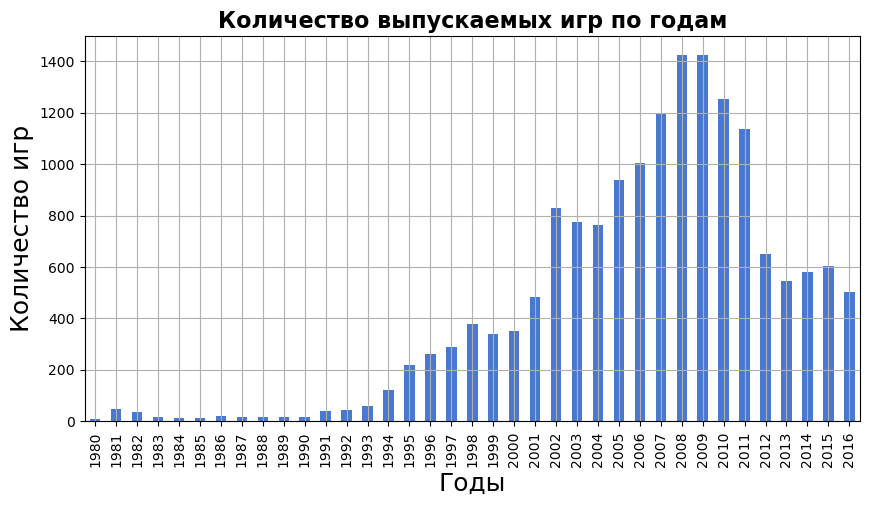

In [29]:
stat_bar('year_of_release', 'count')

Уберем сразу период до 2001

In [30]:
data = data.query ('year_of_release>=2001')
data.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 14119 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14119 non-null  object 
 1   platform         14119 non-null  object 
 2   year_of_release  14119 non-null  int32  
 3   genre            14119 non-null  object 
 4   na_sales         14119 non-null  float64
 5   eu_sales         14119 non-null  float64
 6   jp_sales         14119 non-null  float64
 7   other_sales      14119 non-null  float64
 8   critic_score     14119 non-null  int32  
 9   user_score       14119 non-null  float64
 10  rating           14119 non-null  object 
 11  total_sales      14119 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.3+ MB


### Уровень продаж платформ
*Посмотрим на общий уровень продаж платформ.*

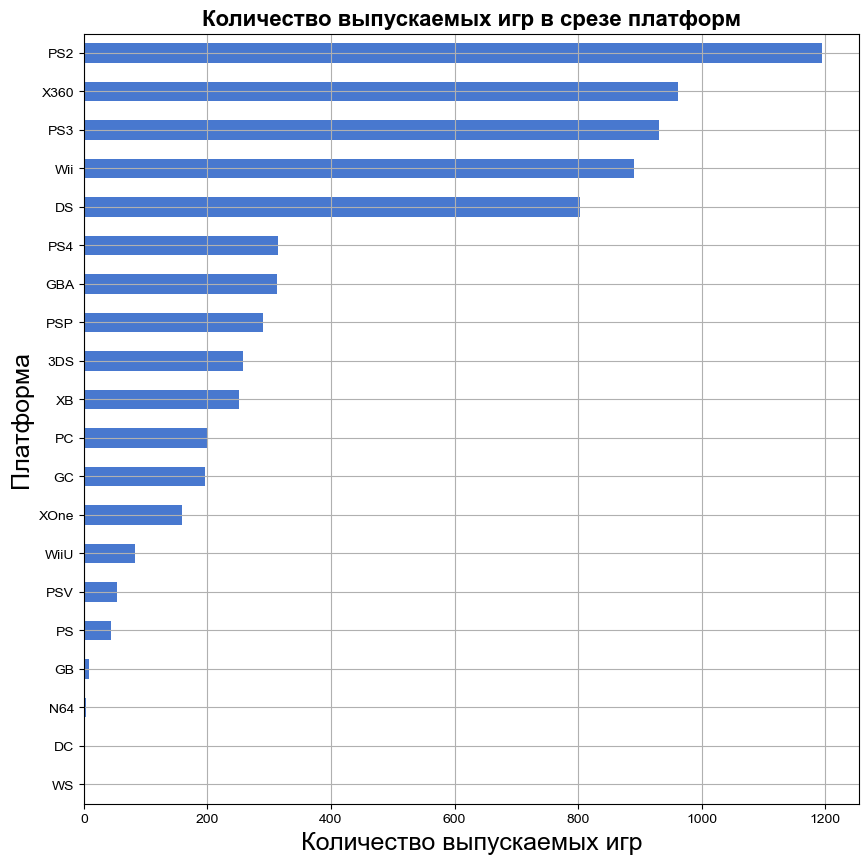

In [31]:
stat_bar('platform', 'sum', 'total_sales')

**Вывод** 

Можем отметить, что на рынке, по состянию на 2016 год, присуствуют явные лидеры. Но важно помнить, что этот показатель за весь период жизни консоли, и те платформы, которые вышли на рынок не так давно, еще не нарастили обороты. Прим. консоль GBA в расчет не берем, так как на момент выгрузке приставке 11 лет, с момента последней модификации прошло более 5 лет, 32-х разрядная приставка морально и технически устарела. PS4 хоть и по продажам почти равна гембою, но она только поступила в продажи

### Срок жизни платформ
*За какой характерный срок появляются новые и исчезают старые платформы?*

*соберем лидеров в отдельный список*

In [32]:
platforms_leaders =data.groupby('platform')['total_sales'].sum().sort_values()[-15:].index.tolist()
platforms_leaders


['PSV',
 'WiiU',
 'XOne',
 'GC',
 'PC',
 'XB',
 '3DS',
 'PSP',
 'GBA',
 'PS4',
 'DS',
 'Wii',
 'PS3',
 'X360',
 'PS2']

*создадим сет только с лидерами*

In [33]:
data_leaders = data.query ('platform== @platforms_leaders')
data_leaders.head () 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91


Построим графики продаж по годам выбранных лидеров, для начала соберем наших лидеров в отдельную таблицу

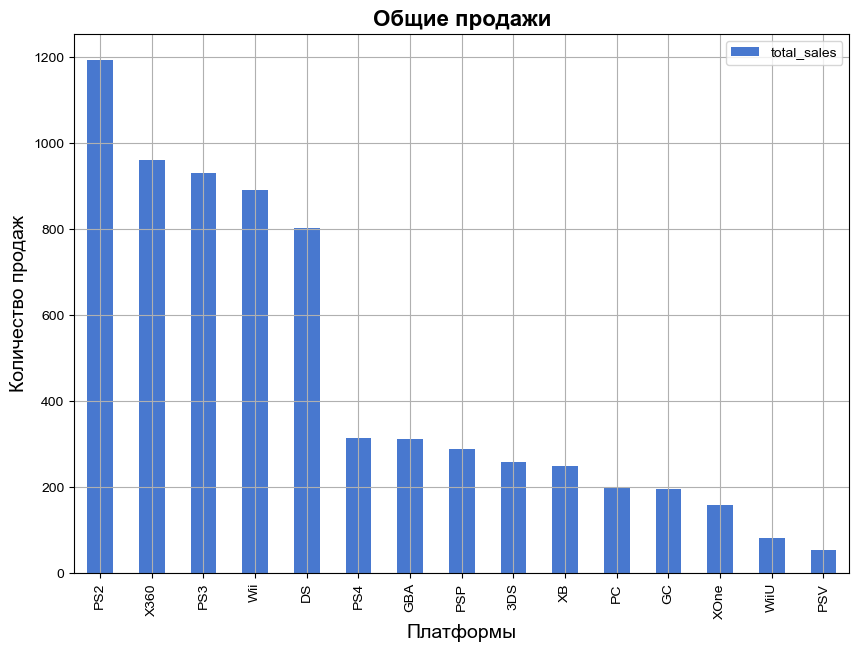

In [34]:
platform_leaders=data_leaders.pivot_table(index='platform',values='total_sales', aggfunc='sum')
platform_leaders.sort_values(by='total_sales',ascending=False).plot(kind='bar',figsize=(10,7), grid=True)

plt.title('Общие продажи', fontsize=16, fontweight='bold')
plt.xlabel('Платформы', fontsize=14)
plt.ylabel('Количество продаж', fontsize=14)
plt.rcParams['font.family'] = 'Arial'
plt.show()


Теперь сведем даные по продажам 

<Figure size 1200x800 with 0 Axes>

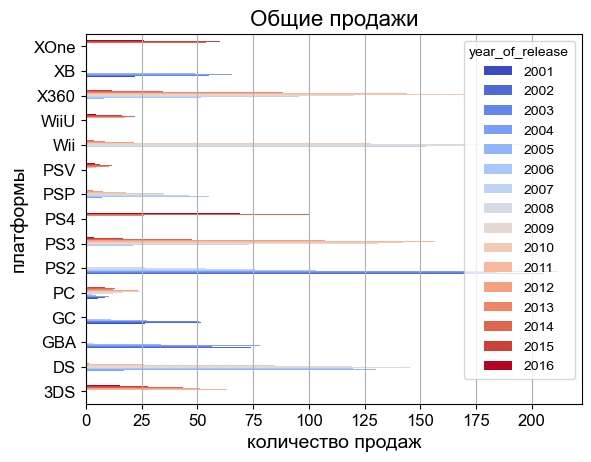

In [35]:
platform_leaders_years=data_leaders.pivot_table(index="platform",columns='year_of_release',values='total_sales',aggfunc=('sum'))
plt.figure(figsize=(12,8))
platform_leaders_years.plot(kind='barh', cmap='coolwarm')
plt.grid(axis='x')
plt.title('Общие продажи', fontsize=16)
plt.xlabel('количество продаж', fontsize=14)
plt.ylabel('платформы', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Как видно визуализация не очень удачная, посмтроить тепловую карту

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

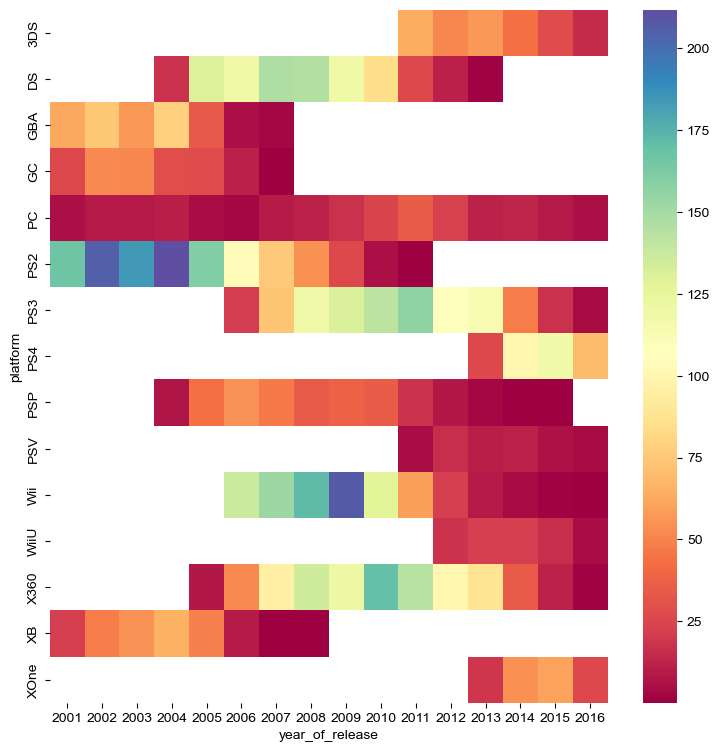

In [36]:
plt.figure(figsize=(9,9))
sns.heatmap(platform_leaders_years, cmap='Spectral')

Такой график становится более понятным. Можем утверждать что в компания, которые выпускают несколько поколений консолей, наблюдается тенденция к циклу в 10 лет жизни каждого поколения устройств, особено хорошо видно это на приставках от компании сони (PS-PS2_PS3-PS4) и майкрософт (XB-XB360-XBOne), из этого описания выбивается PC. В основном стартуют все платформы хорошо, с высокими продажами, к середине цикла прадажи наращиваются. Из этого описания выбивает приставка Wii, которая стартовала очень хорошо, и стала резко терять популярность в 2011-2012 гг. Уже сейчас на текущих данных, можно сделать обоснованное предположение на 2017 год, что продажи будут только расти ближайшие годы для недавно вышедших платформ - PS4 и XBOne

### Уровень продаж и срок жизни платформ срок 3 года 
*Проведем аналогичное исследование но на более короткой дистанции - 3 года. (замена 5 на 3 года)*

In [37]:
data_3 = data.query ('year_of_release>=2014')
platforms_leaders_3 =data_3.groupby('platform')['total_sales'].sum().sort_values()[-7:].index.tolist()
data_leaders_3 = data_3.query ('platform== @platforms_leaders_3')

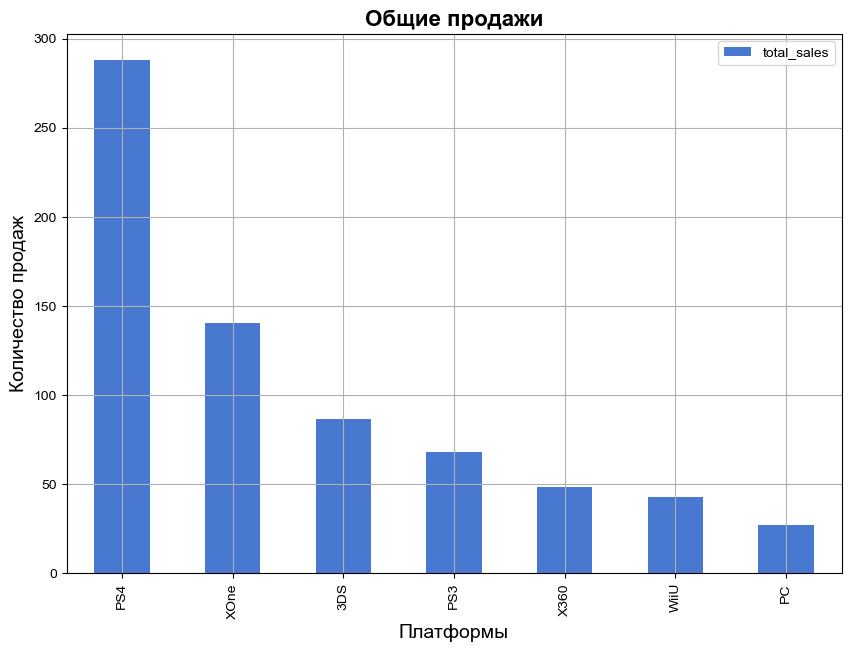

In [38]:
platform_leaders_3 = data_leaders_3.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_leaders_3.sort_values(by='total_sales', ascending=False).plot(kind='bar', figsize=(10, 7), grid=True)

plt.title('Общие продажи', fontsize=16, fontweight='bold')
plt.xlabel('Платформы', fontsize=14)
plt.ylabel('Количество продаж', fontsize=14)
plt.rcParams['font.family'] = 'Arial'
plt.show()

In [39]:
platform_leaders_years_3=data_leaders_3.pivot_table(index="platform",columns='year_of_release',values='total_sales',\
                                                    aggfunc=('sum'))

<Figure size 1200x800 with 0 Axes>

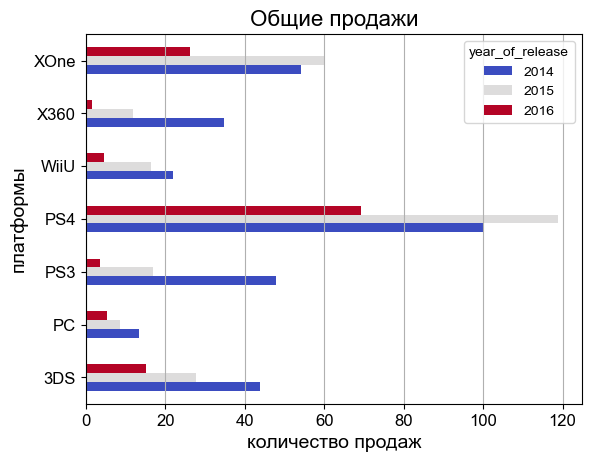

In [40]:

plt.figure(figsize=(12,8))
platform_leaders_years_3.plot(kind='barh', cmap='coolwarm')
plt.grid(axis='x')
plt.title('Общие продажи', fontsize=16)
plt.xlabel('количество продаж', fontsize=14)
plt.ylabel('платформы', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

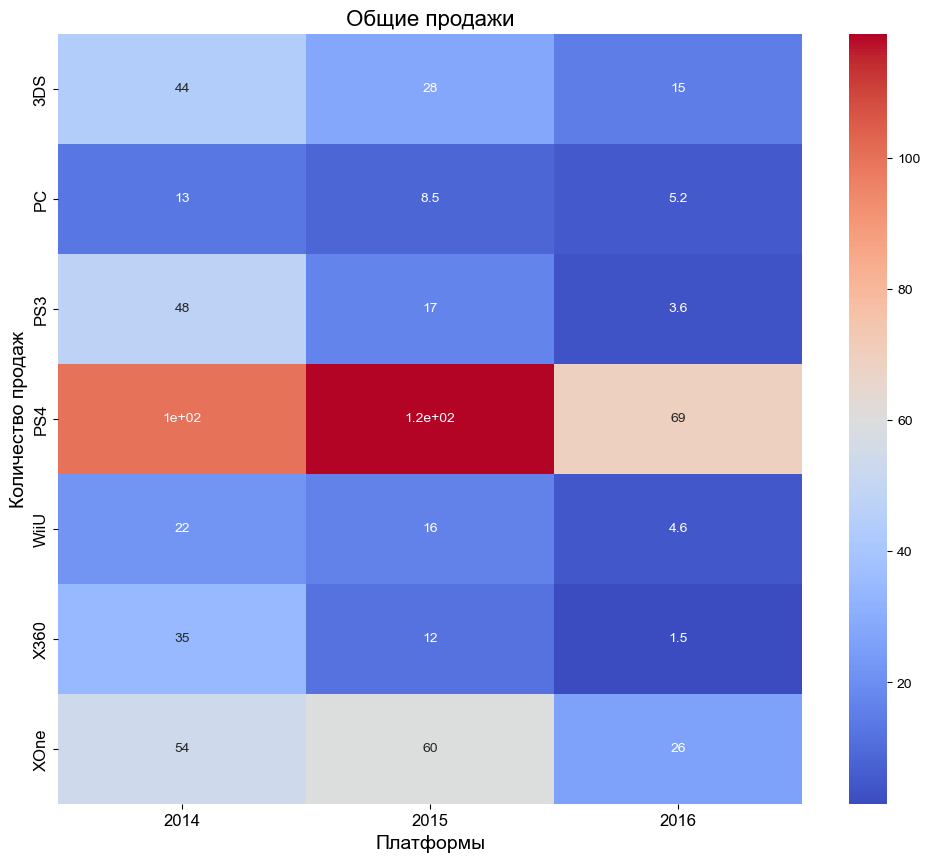

In [41]:

plt.figure(figsize=(12,10))
sns.heatmap(platform_leaders_years_3, annot=True, cmap='coolwarm')
plt.title('Общие продажи', fontsize=16)
plt.xlabel('Платформы', fontsize=14)
plt.ylabel('Количество продаж', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Вывод**

В общем и целом картина не поменялась, лидеры консоли от майкрософт и сони. Сони выглядит значительно преспективнее. Но про приставки от компании Nindendo, не стоит забывать

### "Коробка с усами" 
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

Для начала соберем сводной таблицей все продажи по платформам

In [42]:
platform_sales_3=data_leaders_3.pivot_table(index="platform",values='total_sales',aggfunc=('sum')).reset_index ()
platform_sales_3

,platform,total_sales
0,3DS,86.68
1,PC,27.05
2,PS3,68.18
3,PS4,288.15
4,WiiU,42.98
5,X360,48.22
6,XOne,140.36


*построим графики*

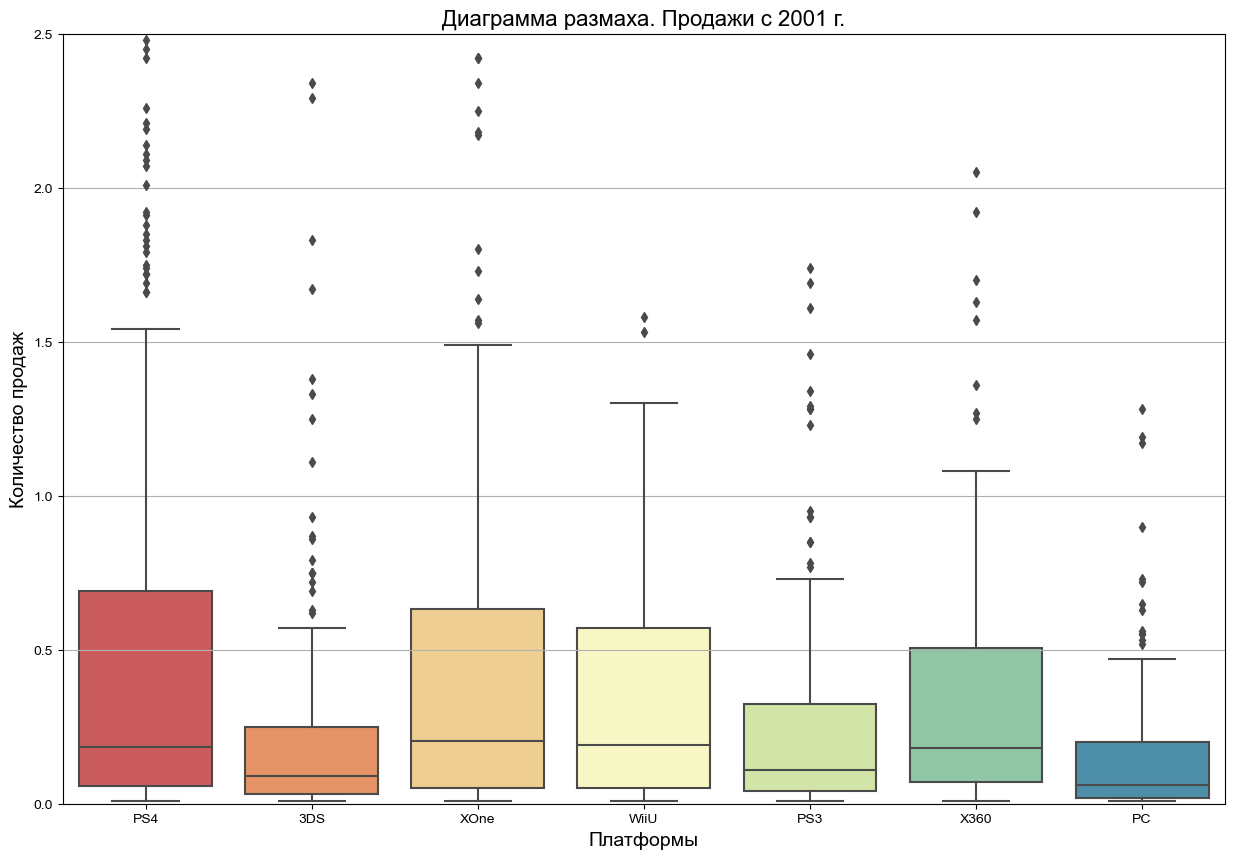

In [43]:
plt.figure(figsize=(15,10))
plt.ylim (0,2.5)
plt.grid(axis='y', alpha=1)

sns.boxplot(x='platform', y='total_sales', data=data_leaders_3, palette='Spectral')
plt.title('Диаграмма размаха. Продажи с 2001 г.', fontsize=16)
plt.xlabel('Платформы', fontsize=14)
plt.ylabel('Количество продаж', fontsize=14)
plt.show()

**Вывод**

На графике можем обратить внимание, что платформы последних покалений от сони и майкрософт (PS3/PS4 и XB360/XBOne), имеют практически одинаковые медианы и квартили, с достаточно выраженной скошенностью вправо. Сначала предположил, что консоли одного поколения, безотносительно производителя, имеюет схожие разбросы, проверил принадлежность к тому или иному покалению консоли из списка - гипотеза не подтвердилась, просто визуальное совпадение. Вероятно, схожая картина в части общего спроса, но хотя гранийы "коробки" почти совпадают, у них разнятся скосы медиан. 
Война консолей в графике))))

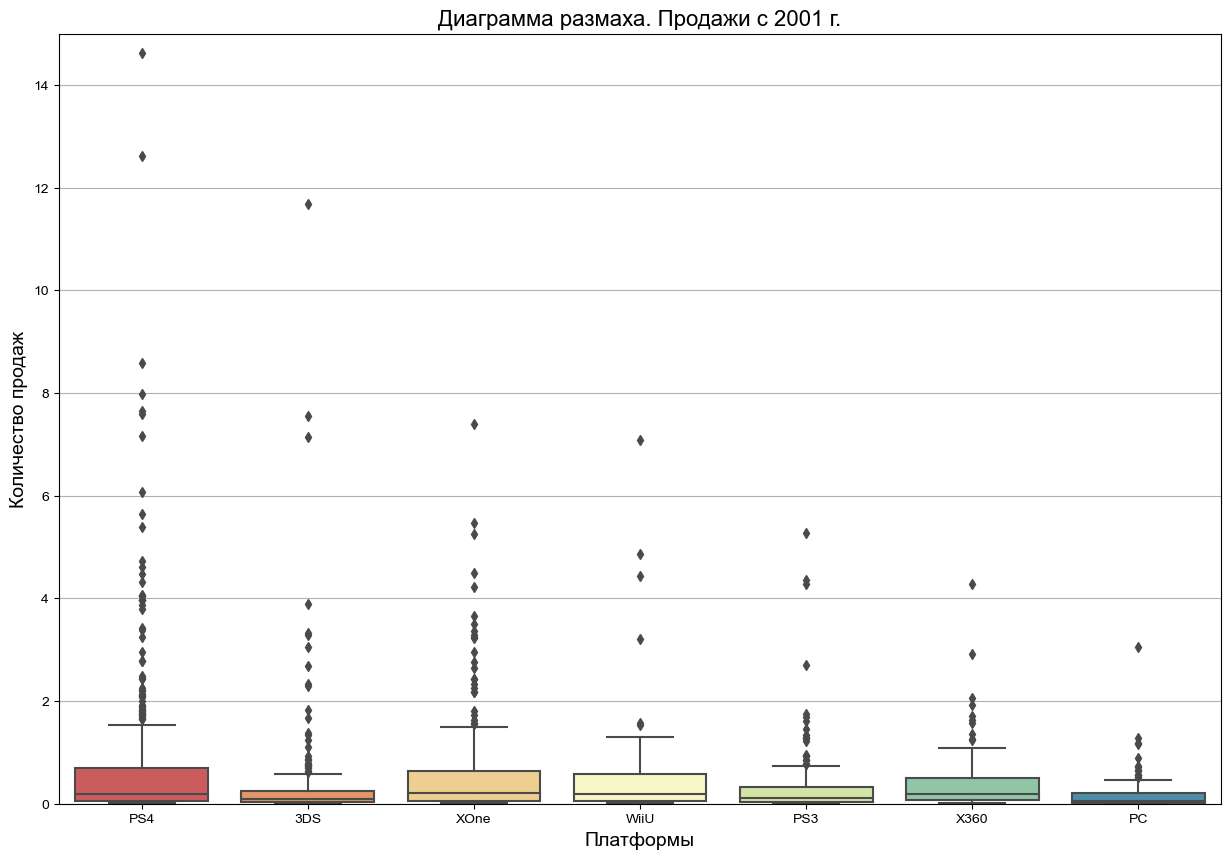

In [44]:
plt.figure(figsize=(15,10))
plt.ylim (0,15)
plt.grid(axis='y', alpha=1)

sns.boxplot(x='platform', y='total_sales', data=data_leaders_3, palette='Spectral')
plt.title('Диаграмма размаха. Продажи с 2001 г.', fontsize=16)
plt.xlabel('Платформы', fontsize=14)
plt.ylabel('Количество продаж', fontsize=14)
plt.show()

### Расчет корреляции
Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 
За популярную консоль возьмем PS3 (я за сони))) )

**Прим** Для отработки отсеем наши заглушки по категориям

#### Расчет для одной платформы 
Для начала сделаем выборку по платформе

In [45]:
ps3_data_3_crit = data_leaders_3.query ('platform=="PS3" and critic_score<=100')
ps3_data_3_user = data_leaders_3.query ('platform=="PS3" & user_score<=10')
display (ps3_data_3_crit.describe ())
ps3_data_3_user.describe ()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2014.027778,0.115000,0.106667,0.049167,0.044722,66.555556,6.330556,0.315556
std,0.166667,0.135425,0.144163,0.081254,0.053157,13.557169,1.665416,0.346290
min,2014.000000,0.000000,0.000000,0.000000,0.000000,36.000000,3.100000,0.010000
25%,2014.000000,0.030000,0.010000,0.000000,0.010000,58.750000,5.125000,0.095000
50%,2014.000000,0.050000,0.030000,0.020000,0.020000,67.000000,6.800000,0.160000
75%,2014.000000,0.142500,0.125000,0.060000,0.060000,75.250000,7.725000,0.432500
max,2015.000000,0.460000,0.560000,0.400000,0.200000,91.000000,8.600000,1.280000


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,2014.448980,0.173367,0.199490,0.050612,0.073367,94.673469,6.014286,0.496837
std,0.659935,0.239294,0.412749,0.082460,0.111058,23.024315,1.853222,0.711420
min,2014.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.200000,0.010000
25%,2014.000000,0.030000,0.020000,0.000000,0.010000,73.000000,4.525000,0.102500
50%,2014.000000,0.090000,0.085000,0.015000,0.040000,111.000000,6.550000,0.285000
75%,2015.000000,0.220000,0.210000,0.060000,0.090000,111.000000,7.400000,0.605000
max,2016.000000,1.560000,3.020000,0.420000,0.680000,111.000000,8.600000,4.360000


In [46]:
display (ps3_data_3_crit ['total_sales'].corr(ps3_data_3_crit['critic_score']))
display (ps3_data_3_user ['total_sales'].corr(ps3_data_3_user['user_score']))


0.44657460493190715

-0.16676141347662105

Коррелиция низкая, отзывы критиков чуть лучше коррелируются с продажами, а вот отзывы игроков, почти не связаны с продажами. 

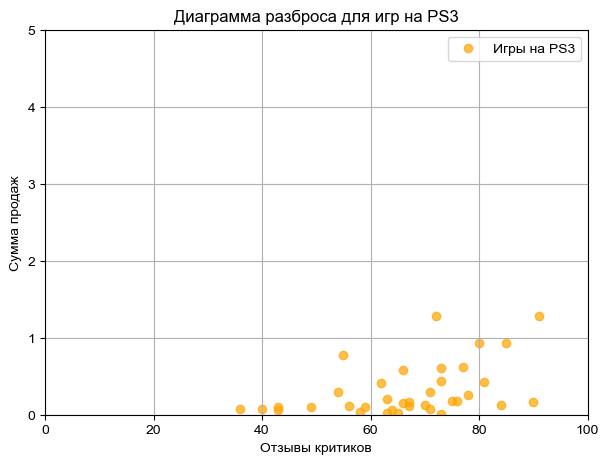

In [47]:
plt.figure(figsize=(7, 5))
plt.ylim (0,5)
plt.xlim (0,100)
plt.scatter(x=ps3_data_3_crit['critic_score'], y=ps3_data_3_crit['total_sales'], c='orange', alpha=0.7)
plt.grid(True)
plt.xlabel('Отзывы критиков')
plt.ylabel('Сумма продаж')
plt.title('Диаграмма разброса для игр на PS3')
plt.legend(['Игры на PS3'])
plt.show()

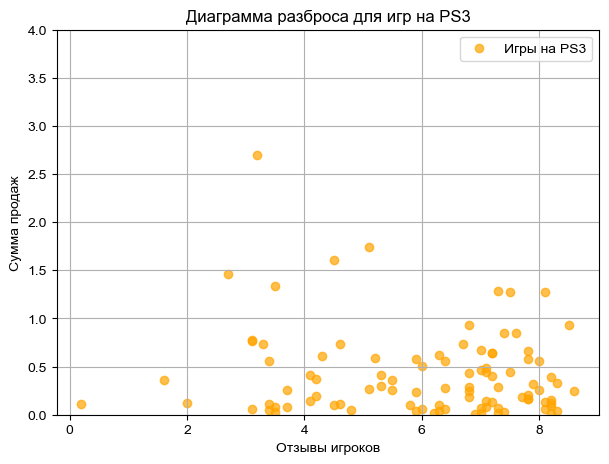

In [48]:
plt.figure(figsize=(7, 5))
plt.ylim (0,4)
plt.scatter(x=ps3_data_3_user['user_score'], y=ps3_data_3_user['total_sales'], c='orange', alpha=0.7)
plt.grid(True)
plt.xlabel('Отзывы игроков')
plt.ylabel('Сумма продаж')
plt.title('Диаграмма разброса для игр на PS3')
plt.legend(['Игры на PS3'])
plt.show()

#### Корреляция для лидеров рынка
Посмотрим на продажи игр на других платформах

у нас уже есть выборка лидеров продаж data_leaders (дс с лидерами) и platforms_leaders (список лидеров)

In [49]:
platforms_leaders_3

['PC', 'WiiU', 'X360', 'PS3', '3DS', 'XOne', 'PS4']

'Корреляция PC : 0.1746'

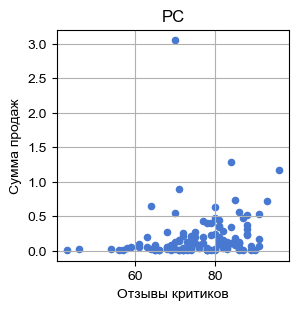

'Корреляция WiiU : 0.3702'

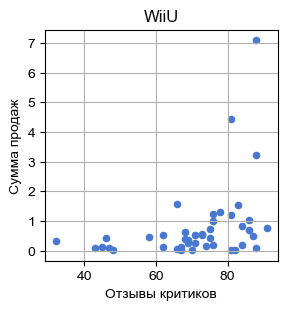

'Корреляция X360 : 0.5257'

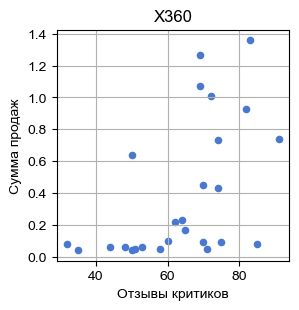

'Корреляция PS3 : 0.4466'

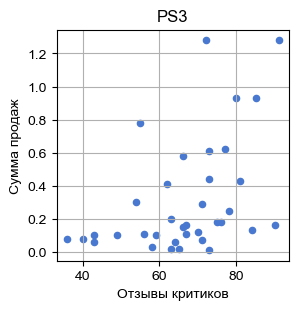

'Корреляция 3DS : 0.3141'

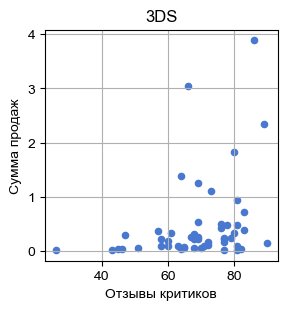

'Корреляция XOne : 0.4287'

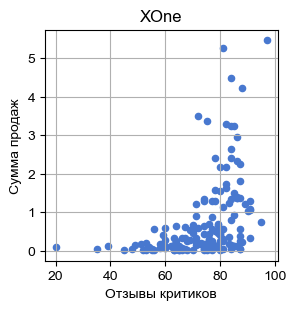

'Корреляция PS4 : 0.4027'

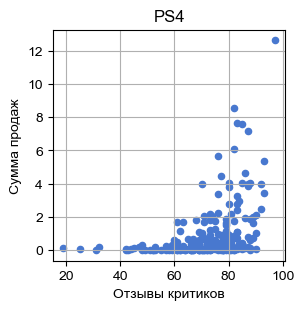

In [50]:
for index in platforms_leaders_3:
    df= data_leaders_3.query (f'platform == "{index}" and critic_score<=100')
    correlation = df['total_sales'].corr(df['critic_score'])
    display ( f'Корреляция {index} : {correlation:.4f}')
    df.plot(y='total_sales', x='critic_score', kind='scatter', grid=True, figsize=(3,3))
    plt.grid(True)
    plt.title(index)
    plt.ylabel('Сумма продаж')
    plt.xlabel('Отзывы критиков')
    plt.show()
    
    


*Сделаем тоже самое для оценки игроков*

'Корреляция PC : -0.0716'

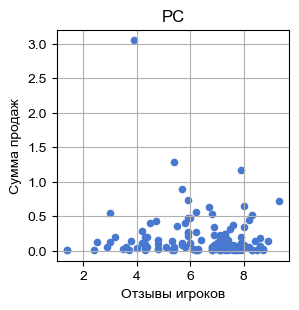

'Корреляция WiiU : 0.4079'

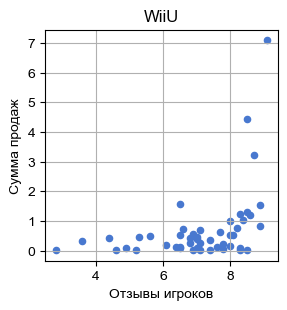

'Корреляция X360 : -0.1384'

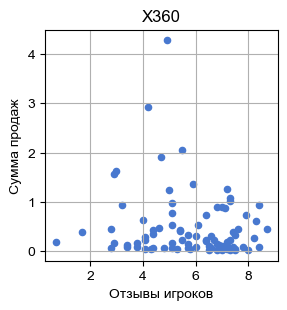

'Корреляция PS3 : -0.1668'

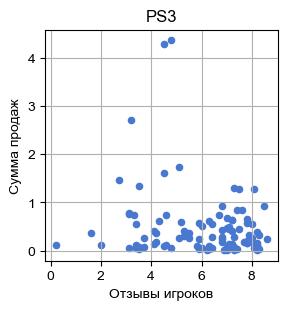

'Корреляция 3DS : 0.2152'

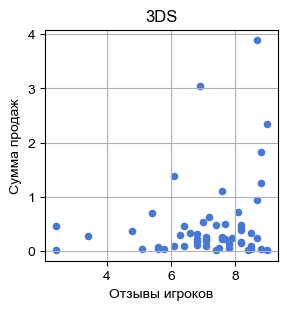

'Корреляция XOne : -0.0704'

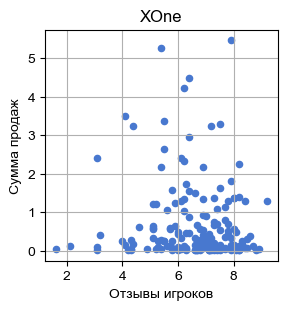

'Корреляция PS4 : -0.0401'

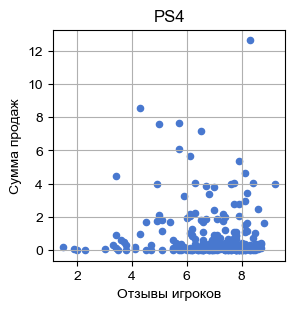

In [51]:
for index in platforms_leaders_3:
    df = data_leaders_3.query (f'platform == "{index}" and user_score<=10')
    correlation = df['total_sales'].corr(df['user_score'])
    display ( f'Корреляция {index} : {correlation:.4f}')
    df.plot(y='total_sales', x='user_score', kind='scatter', grid=True, figsize=(3,3))
    plt.grid(True)
    plt.title(index)
    plt.ylabel('Сумма продаж')
    plt.xlabel('Отзывы игроков')
    plt.show()

В общем и целом картина схожа с той что получили с PS3, однако есть и примеры отрицательной коррелиции с оценками пользователей у пользоватлей ПК, PS4, XBOne.
Это может быть вызвано несколькими причинами. Во-первых, оценки игроков могут быть неоднородными и не всегда соответствовать реальному качеству игры, так как они могут быть субъективными и зависеть от индивидуальных предпочтений каждого игрока. Во-вторых, игры с высокими оценками игроков не обязательно являются коммерческими успехами, так как продажи могут зависеть от других факторов, таких как маркетинг, реклама, доступность игры, цена и т.д.

Также следует отметить, что корреляция не обязательно означает причинно-следственную связь между оценками игроков и продажами игр. Это может быть просто случайность или результат влияния других факторов на продажи игр.

### Оценка жанров игр по продажам
Посмотрим на общее распределение игр по жанрам. Попробуем ответить на вопрос - Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Самые продаваемые: Экшен, спорт, шутеры, хуже всего - стратегии и пазл. З.Ы. явно не мой личный рейтинг

<Figure size 1200x800 with 0 Axes>

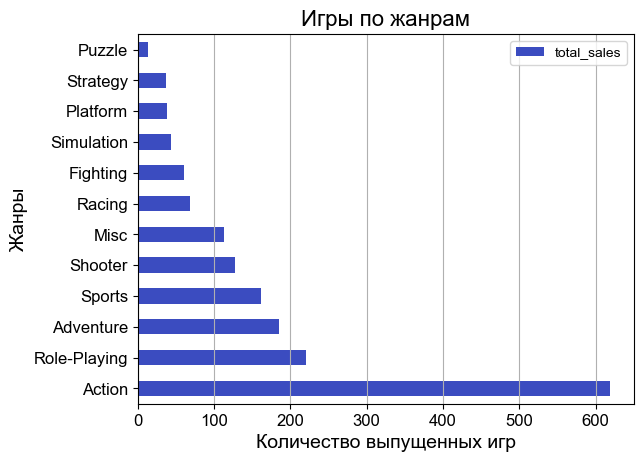

In [52]:
data_genre = data_3.pivot_table (index='genre', values='total_sales', aggfunc ='count').sort_values (by='total_sales',\
                                                                                                 ascending=False)
plt.figure(figsize=(12,8))
data_genre.plot(kind='barh', cmap='coolwarm')
plt.grid(axis='x')
plt.title('Игры по жанрам', fontsize=16)
plt.xlabel('Количество выпущенных игр', fontsize=14)
plt.ylabel('Жанры', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

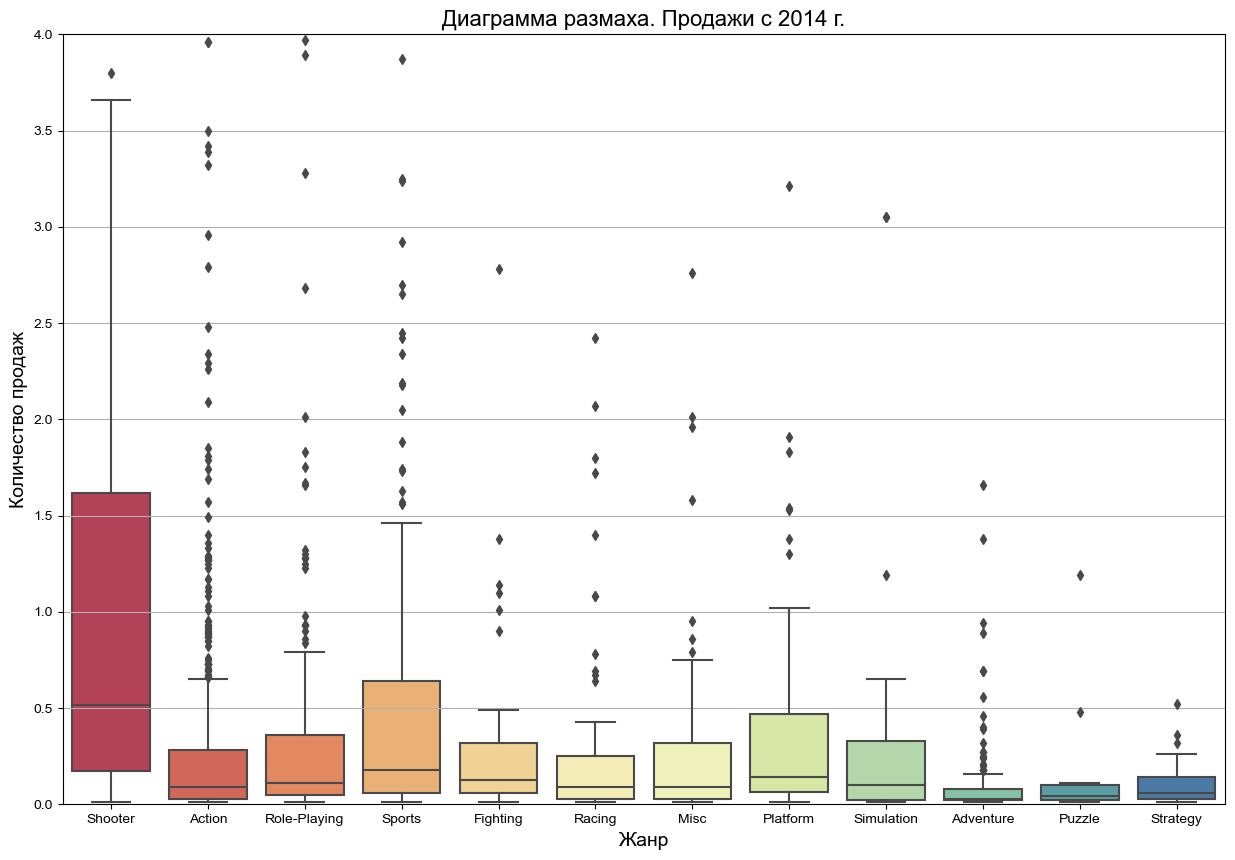

In [53]:
plt.figure(figsize=(15,10))
plt.ylim (0,4)
plt.grid(axis='y', alpha=1)

sns.boxplot(x='genre', y='total_sales', data=data_3, palette='Spectral')
plt.title('Диаграмма размаха. Продажи с 2014 г.', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Количество продаж', fontsize=14)
plt.show()

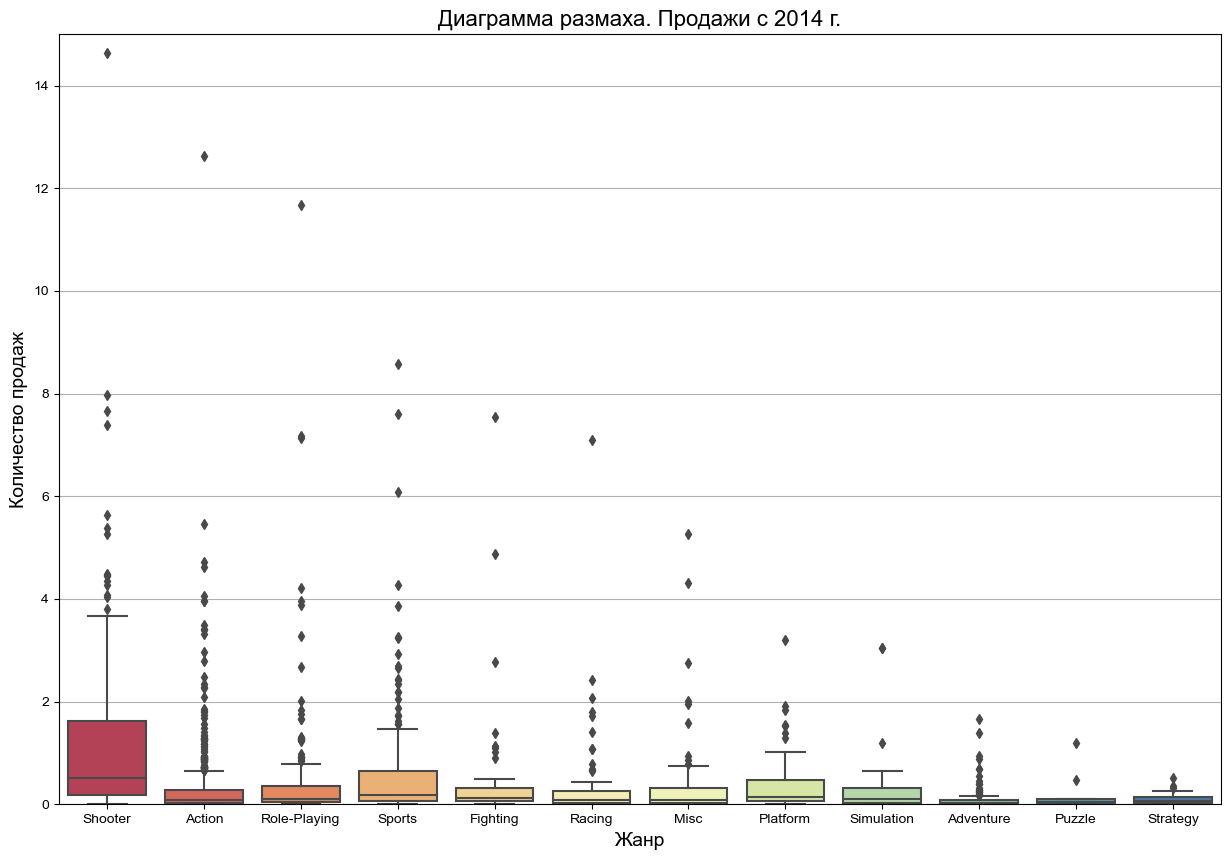

In [54]:
plt.figure(figsize=(15,10))
plt.ylim (0,15)
plt.grid(axis='y', alpha=1)

sns.boxplot(x='genre', y='total_sales', data=data_3, palette='Spectral')
plt.title('Диаграмма размаха. Продажи с 2014 г.', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Количество продаж', fontsize=14)
plt.show()

## Анализ рынков регионов и пользователей
### Составьте портрет пользователя каждого региона**

Определите для пользователя каждого региона (NA, EU, JP):

    1.1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    1.2. Самые популярные жанры (топ-5). Поясните разницу.
    1.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [55]:

data_3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,111,111.0,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,111,111.0,undefined,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,111,111.0,undefined,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16431,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,111,111.0,undefined,0.01
16435,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,111,111.0,undefined,0.01
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,111,111.0,undefined,0.01
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,111,111.0,undefined,0.01


####  Топ-5 платформ по регионам
Начнем с платформ. Сгруппируем дс по платформам и продажам в каждом из регионов, выберем 5 лидеров для каждого региона

Нам предстоят однотипные вычисления, сделаем для них функцию

In [56]:
def region_sales(data, task, n=5):
    region = ['na', 'eu', 'jp']
    sales_column = ['na_sales','eu_sales', 'jp_sales']
    fig, axs = plt.subplots(nrows=1, ncols=len(sales_column), figsize=(15,5))    
    
    if task==1:
        
        
        for i, r in enumerate(region):
            for j, s in enumerate(sales_column):
                if r in s:
                    region_sales = data.pivot_table(index='platform', values=s, aggfunc='sum').sort_values(by=s)[-n:]
                    axs[j].barh(region_sales.index, region_sales[s])
                    axs[j].set_xlabel('Количество продаж в {}'.format(r))
                    axs[j].set_ylabel('Платформы')
                    axs[j].set_title('Топ {} платформ по продажам в {}'.format(n, r))
        
    
   
        plt.tight_layout()
        plt.show()
        
        
    if task==2:
        for i, r in enumerate(region):
            for j, s in enumerate(sales_column):
                if r in s:
                    region_sales = data.pivot_table(index='genre', values=s, aggfunc='sum').sort_values(by=s)[-n:]
                    axs[j].barh(region_sales.index, region_sales[s])
                    axs[j].set_xlabel('Количество продаж в {}'.format(r))
                    axs[j].set_ylabel('Жанр')
                    axs[j].set_title('Топ {} жанров по продажам в {}'.format(n, r))
        
    
   
        plt.tight_layout()
        plt.show()
        
        
    if task==3:
        for i, r in enumerate(region):
            for j, s in enumerate(sales_column):
                if r in s:
                    region_sales = data.pivot_table(index='rating', values=s, aggfunc='sum').sort_values(by=s)[-n:]
                    axs[j].barh(region_sales.index, region_sales[s])
                    axs[j].set_xlabel('Количество продаж в {}'.format(r))
                    axs[j].set_ylabel('Рейтинг')
                    axs[j].set_title('Топ {} рейтингов по продажам в {}'.format(n, r))
        
        plt.tight_layout()
        plt.show()
        


Как можем видеть, для североамериканского региона самые популярными являются приставки X360, PS2, Wii, PS3, DS. Но мы помним, что есть две приставки, которые вышли позже всех, и они все еще набирают обороты продаж, и как показывает анализ, апогей продаж еще у них впереди.

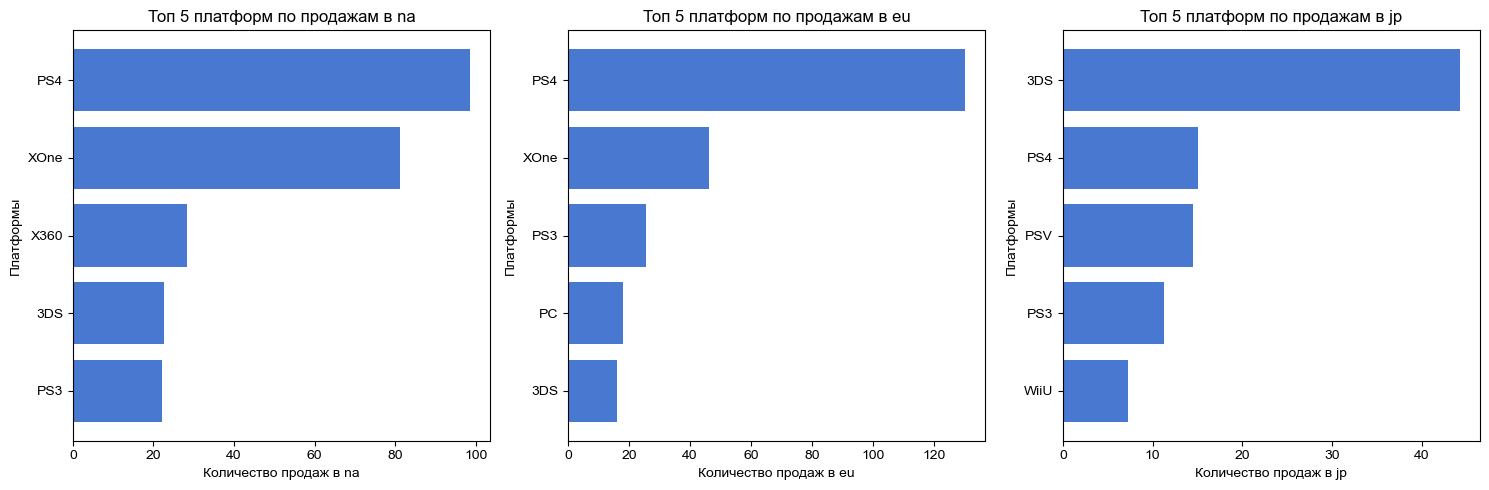

In [57]:
region_sales(data_3, task=1)


**Вывод**

В североамериканском регионе лидирует консоль от Microsoft, что ожидаемо, так как там основной рынок данной компании. Для рынка Японии лидер DS - портативная приставка, родом так же из Японии, учитывая специфику страны в части плотности населения, размера квартир, зачастую соместного проживания большой семьей в небольшом помещении, ритм жизни (жизнь в дороге), японцам удобнее играть на портативных приставках. А вот рынок Европы уже больше склоняется к полноразмерной игровой приставке, но таких ограничений нет как в Японии, а распостранение компании Microsoft слабее, скорее всегоименно за пределами родных стран идет основная борьба между Microsoft и Sony

#### Самые популярные жанры (топ-5). 

По аналогии с обработкой сета по платформам, сделаем обработку по жанрам

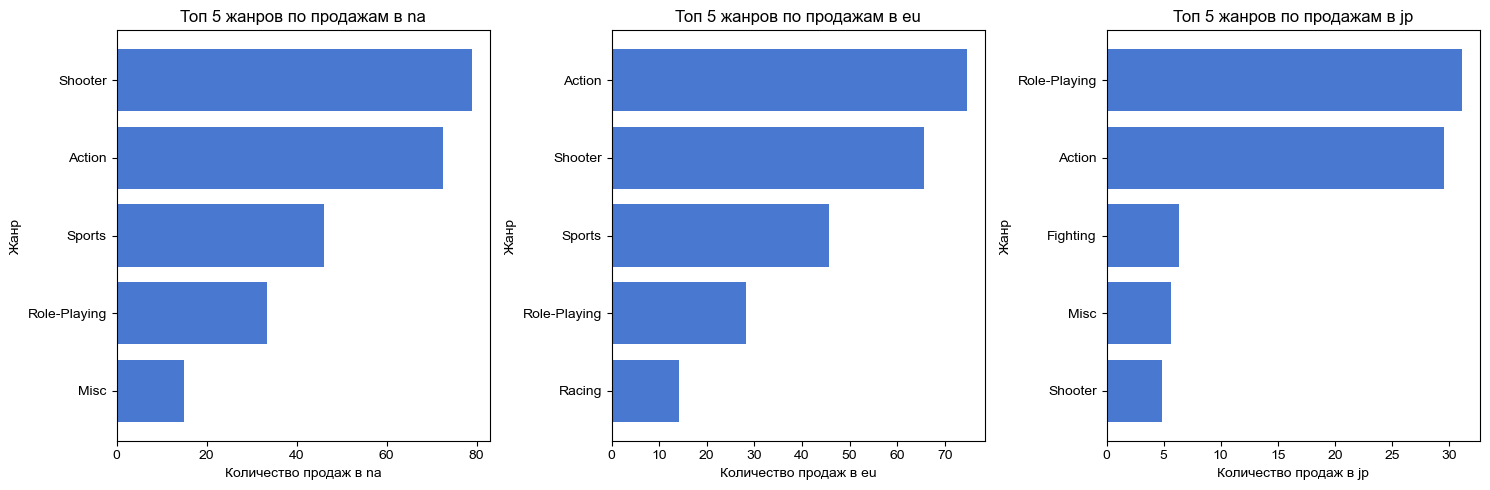

In [58]:
region_sales(data_3, task=2)

**Вывод** 

Распределение лидеров в Америке и Европе практически совпали, лидеры Экшен и спорт, в данных регионах популярны приключения и спортивные игры (фифа, нба и т.п.), а в Японии лидируют ролевые игры, что тоже можно объяснить тем, что Японимая является родиной ролевых игр.

#### Топ-5 жанров по регионам
Разберем влияет ли рейтинг ESRB на продажи в отдельном регионе.

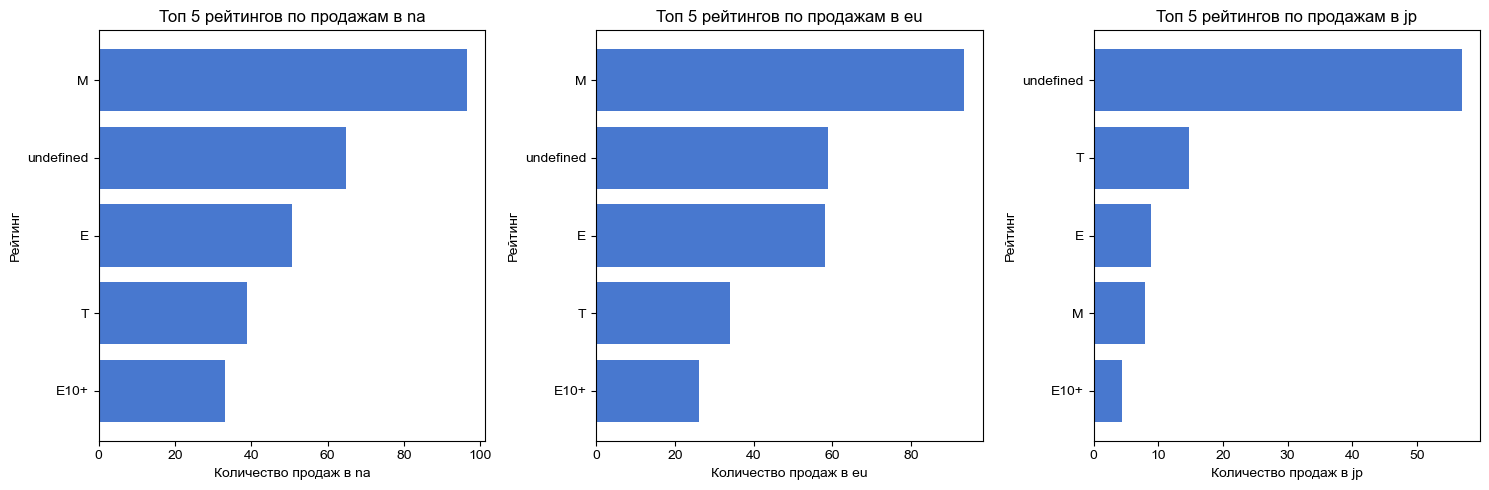

In [59]:
region_sales(data_3, task=3)

**Вывод**

Картины в целом схожи, топ-5 позиций занимают одинаковые значения: M («Mature» — «Для взрослых»), E ((«Everyone») — «Для всех»), T («Teen» — «Подросткам»), E10+ («Everyone 10 and older» — «Для всех от 10 лет и старше»).
Стоит отметить, что система рейтинга ESRB - это американская система, разработная компание RockStar (серия игр GTA их детище). Соответвенно и распостранение система получала изначально на своем рынке. 

А вот в Японии, как мы видим, много игр без рейтинга, при условии допущения, что ошибок в выгрузке в части рейтинга нет, нужно помнить, что в Японии игровая индустрия имеет давние традиции и культурные особенности, которые могут объяснить большое количество игр без возрастного рейтинга.

Во-первых, в Японии есть традиция разработки игр, которые могут нацелены на различные возрастные группы и не требуют обязательного ограничения по возрасту. Такие игры могут быть более простыми и легкими, и могут содержать более мягкую насилие или другие контент, который в других странах может быть ограничен.

Во-вторых, в Японии существует система рейтинговой оценки игр, которая аналогична ESRB в США и PEGI в Европе, называется CERO. Однако, это необязательная система рейтинговой оценки, и разработчики не обязаны проходить ее процедуру оценки, что может приводить к большему количеству игр без рейтинга.

Также в Японии существуют более лояльные к насилию и отклонениям в поведении стандарты, поэтому многие игры, которые могут быть запрещены или ограничены в других странах, могут быть свободно выпущены в Японии.

Наконец, стоит отметить, что существует некоторое количество игр в Японии, которые содержат откровенно сексуальный контент, но эти игры не могут быть проданы в обычных магазинах, а распространяются через специальные магазины и интернет-сайты, которые специализируются на этом типе контента.

**Прим.*** учитывая что для этого анализа взял более короткий период а не весь период игростроя, чтож, могу утверждать, что люди стали более злыми)))) теперь в топе рейтинг для взрослых, где много крови, расчлененка и жестокости (это не тот контент 18+)))) )))

В подтверждение гипотезы визуализируем распределение рейтинга между платформами в Японии. Как видно из результатов лидируют портативные платформы и линейка PS. Присутствие последней в этом топе тоже можно объяснить - родина приставки PS Япония, и как мы видели ранее она занимает второе место по продажам в Японии. Учитывая все вышесказанное в части системы рейтинга, гипотеза об о причинах отсуствия рейтинга в играх японского рынка нала свое подтверждение.

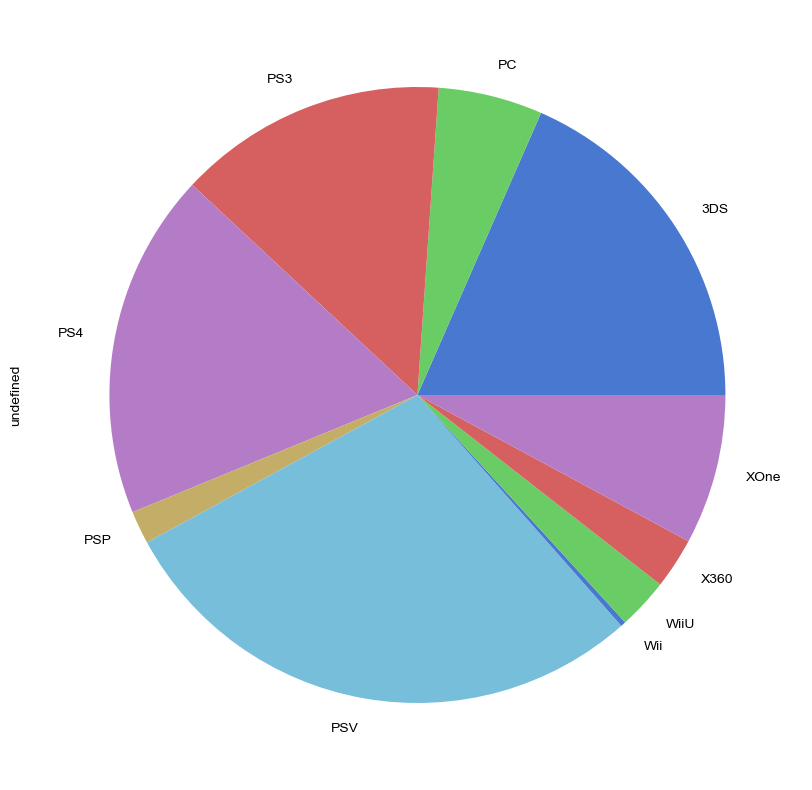

In [60]:
rating_genre=data_3.pivot_table (index='rating', columns='platform', values='jp_sales', aggfunc = 'count')
rating_genre_filt=rating_genre.query ('rating=="undefined"')
df = pd.DataFrame(rating_genre_filt)

df_transposed = df.T
df_transposed.plot(kind='pie', subplots=True, figsize=(10, 10), legend=False)
plt.show()

## Проверьте гипотезы**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### **Первая гипотеза**

Н0-Средние пользовательские рейтинги платформ Xbox One и PC равны,

Н1-Средние пользовательские рейтинги платформ Xbox One и PC не равны

Сразу проведем подготовку, сделаем необходимые выборки, расчеты средних, дисперсий, стандарного отклонения, а также построим графики распределения

Для проверки гипотез нам нужна выборка без заглушек

In [61]:
#датасет без оценкок-заглушек игроков
without_111_data = data_3.query ('user_score<=10')

In [62]:
xbox_data = without_111_data.query ('platform=="XOne"')
pc_data = without_111_data.query ('platform=="PC"')
mean_xbox_user_score = xbox_data['user_score'].mean ()
mean_pc_user_score = pc_data['user_score'].mean ()

variance_xbox = np.var (xbox_data['user_score'], ddof=1)
display (f'Коэффициент дисперсии для Xbox: {variance_xbox:.4f}') 

variance_pc = np.var (pc_data['user_score'], ddof=1)
display (f'Коэффициент дисперсии для PC: {variance_pc:.4f}')  

stand_devia_xbox = np.sqrt (variance_xbox)
display (f'Стандарное отклонение для Xbox: {stand_devia_xbox:.4f}') 

stand_devia_pc = np.sqrt (variance_pc)
display (f'Стандарное отклонение для PC: {stand_devia_pc:.4f}') 

'Коэффициент дисперсии для Xbox: 1.8910'

'Коэффициент дисперсии для PC: 2.9012'

'Стандарное отклонение для Xbox: 1.3751'

'Стандарное отклонение для PC: 1.7033'

In [63]:
xbox_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
241,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
269,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22
372,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72,4.1,M,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
16272,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,111,6.8,T,0.01
16325,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65,6.0,M,0.01
16358,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63,8.2,E,0.01
16371,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,111,6.6,E,0.01


<AxesSubplot:xlabel='user_score', ylabel='Count'>

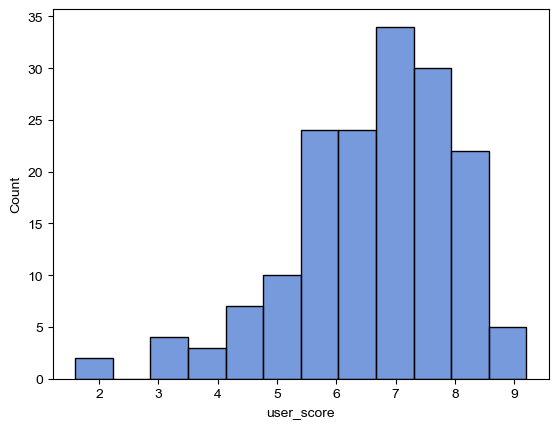

In [64]:
sns.histplot(xbox_data['user_score'])

<AxesSubplot:xlabel='user_score', ylabel='Count'>

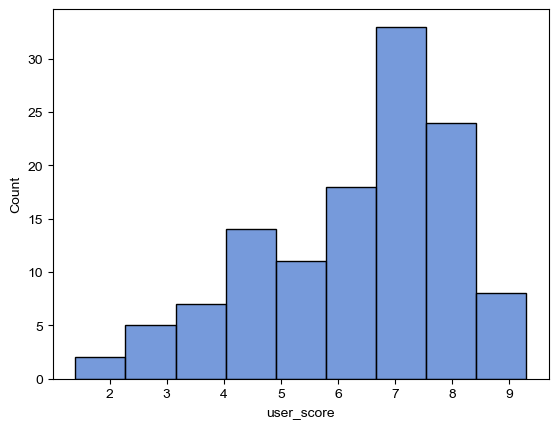

In [65]:
sns.histplot(pc_data['user_score'])

В нашем случае выборка оценок небольшая, берем ее всю

In [66]:
sample_1 = without_111_data[without_111_data['platform']=="XOne"]['user_score']
sample_2 = without_111_data[without_111_data['platform']=="PC"]['user_score']
result =st.ttest_ind (sample_1, sample_2, equal_var=False) #дисперсии разные, поэтому ставим False
display (f'р-значение:{result.pvalue} ')

alpha=0.05

if (result.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

'р-значение:0.11601398086668832 '

Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута. Н0- Средние значения двух генеральных выборок пользовательских рейтингов платформы XOne и PC равны. Прим. в оценке участовали игры только за 3 года

### **Вторая гипотеза**

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0-Средние пользовательские рейтинги жанров Action и Sports равны,

Н1-Средние пользовательские рейтинги жанров Action и Sports не равны,


In [67]:
action_data = without_111_data.query ('genre=="Action"')
spotrs_data = without_111_data.query ('genre=="Sports"')
mean_action_user_score = action_data['user_score'].mean ()
mean_spotrs_user_score = spotrs_data['user_score'].mean ()

variance_action = np.var (action_data['user_score'], ddof=1)
display (f'Коэффициент дисперсии для action: {variance_action:.4f}') 

variance_spotrs = np.var (spotrs_data['user_score'], ddof=1)
display (f'Коэффициент дисперсии для spotrs: {variance_spotrs:.4f}')  

stand_devia_action = np.sqrt (variance_action)
display (f'Стандарное отклонение для action: {stand_devia_action:.4f}') 

stand_devia_spotrs = np.sqrt (variance_spotrs)
display (f'Стандарное отклонение для spotrs: {stand_devia_spotrs:.4f}') 

'Коэффициент дисперсии для action: 1.8985'

'Коэффициент дисперсии для spotrs: 3.4470'

'Стандарное отклонение для action: 1.3779'

'Стандарное отклонение для spotrs: 1.8566'

<AxesSubplot:xlabel='user_score', ylabel='Count'>

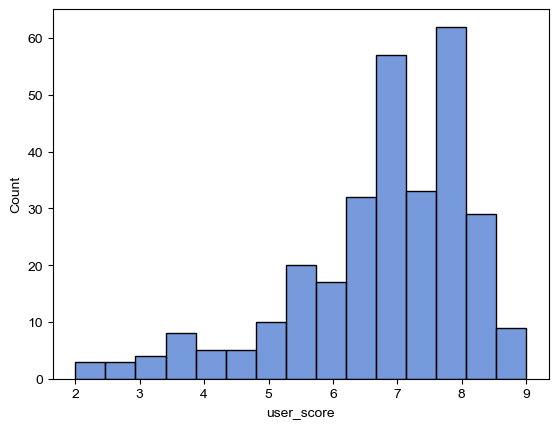

In [68]:
sns.histplot(action_data['user_score'])

<AxesSubplot:xlabel='user_score', ylabel='Count'>

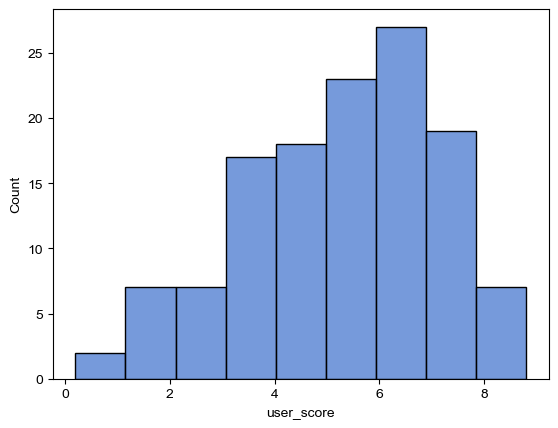

In [69]:
sns.histplot(spotrs_data['user_score'])

In [70]:
sample_action = without_111_data[without_111_data['genre']=="Action"]['user_score']
sample_sports = without_111_data[without_111_data['genre']=="Sports"]['user_score']
result_2 =st.ttest_ind (sample_action, sample_sports, equal_var=False) #дисперсии разные, поэтому ставим False
display (f'р-значение:{result_2.pvalue} ')

alpha=0.05

if (result_2.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

'р-значение:1.1825550382644557e-14 '

Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута. Н0 - Средние значения двух генеральных выборок пользовательских рейтингов жанров Action и Sports равны

Прим. офф-топ, проверку гипотез понял слабо, писал по записям в тетради и конспектам от практикума, к сожалению почти без понимания расчетов. буду признателен если получится прислать интересные материалы для изучения факультативно. Пока сам читаю в основном хабр (там статья по р-значению более менее понятная нашлась)

## **Резюме**
В результате исследования можем отметить несколько ключевых моментов:
    
    - основной рост продаж игр начинается с 1994 года, пик наблюдается в период 2008-2009 гг.
    - установлено, что в основном платформы “живут” около 10 лет.
    - на текущий момент потенциальные лидеры продаж, с учетом периода жизни - PS4, XBox One и 3DS, а учитывая длительный период нахождения в целом в списках платформ, то и PC
    - при определении акцентов по платформам важно учесть и географию, так как в разных регионах свои лидеры. Так:
        - для Североамериканского региона лидер платформы от Microsoft (серия XBox)
        - для европейской части стран - серия платформ от Sony (Play Station)
        - для японского рынка платформы от Nintendo - в данный момент 3DS.
    - стоит учитывать популярность определенных жанров, для североамериканского региона и Европы - Экшен, спортивные игры и шутеры, а для японского рынка - ролевые игры, экшен и misc.
    - лидерами продаж по рейтингам можно отметить игры доступные для всех, с рейтингом М. Но японский рынок и тут выделяется, для данного рынка свойственно не использовать рейтинг, так как культура покупки игры там отличается от принятой на западе. 

В ходе исследования проверены 2 гипотезы:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза подтвердилась.

Средние пользовательские рейтинги жанров Action и Sports одинаковые. Гипотеза не подтвердилась.